In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/covid19s-impact-on-airport-traffic/covid_impact_on_airport_traffic.csv


In [2]:
df = pd.read_csv("/kaggle/input/covid19s-impact-on-airport-traffic/covid_impact_on_airport_traffic.csv")

df.head()

,AggregationMethod,Date,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography
0,Daily,2020-04-03,1.0,Kingsford Smith,64,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
1,Daily,2020-04-13,1.0,Kingsford Smith,29,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
2,Daily,2020-07-10,1.0,Kingsford Smith,54,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
3,Daily,2020-09-02,1.0,Kingsford Smith,18,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
4,Daily,2020-10-31,1.0,Kingsford Smith,22,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."


In [3]:
# Show all columns

df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7247 entries, 0 to 7246
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AggregationMethod  7247 non-null   object 
 1   Date               7247 non-null   object 
 2   Version            7247 non-null   float64
 3   AirportName        7247 non-null   object 
 4   PercentOfBaseline  7247 non-null   int64  
 5   Centroid           7247 non-null   object 
 6   City               7247 non-null   object 
 7   State              7247 non-null   object 
 8   ISO_3166_2         7247 non-null   object 
 9   Country            7247 non-null   object 
 10  Geography          7247 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 622.9+ KB


In [4]:
# Find the unique countries

df.Country.unique()

array(['Australia', 'Chile', 'Canada', 'United States of America (the)'],
      dtype=object)

In [5]:
# Find the unique ISO-3166-2

df.ISO_3166_2.unique()

array(['AU', 'CL', 'CA-AB', 'CA-BC', 'CA-MB', 'CA-NS', 'CA-ON', 'CA-QC',
       'US-CA', 'US-CO', 'US-FL', 'US-GA', 'US-HI', 'US-IL', 'US-MA',
       'US-MI', 'US-NC', 'US-NJ', 'US-NV', 'US-NY', 'US-TX', 'US-VA',
       'US-WA'], dtype=object)

In [6]:
# PercentOfBaseline: Proportion of trips on this date as compared to Avg number of trips on the same day of week in baseline period i.e 1st February 2020 - 15th March 2020

                          Country  Mean_PerBaseline
0                       Australia         37.750973
1                          Canada         77.409347
2                           Chile         34.273109
3  United States of America (the)         64.460932


Text(0.5, 1.0, 'Percentage Of Baseline Mean by Country')

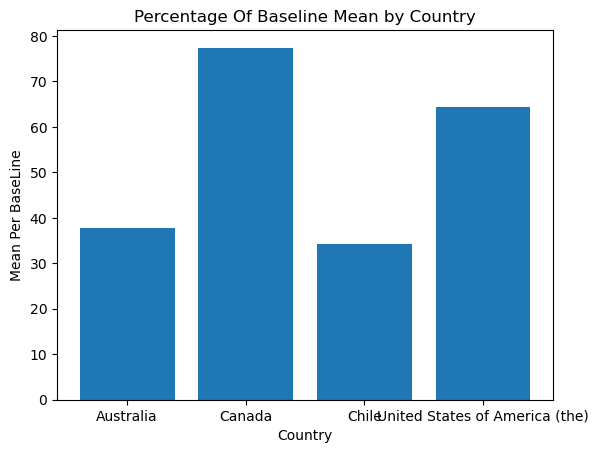

In [7]:
df2 = df.groupby('Country', as_index = False).agg({'PercentOfBaseline' : 'mean'}).rename(columns = {'PercentOfBaseline' : 'Mean_PerBaseline'})
print(df2)

plt.bar(df2['Country'], df2['Mean_PerBaseline'])

plt.xlabel('Country')
plt.ylabel('Mean Per BaseLine')
plt.title('Percentage Of Baseline Mean by Country')

        AirportUpdated  Mean_PerBaseline
0               Boston         64.704981
1              Calgary         89.513410
2            Charlotte         75.375479
3              Chicago         73.084291
4          Dallas/Fort         75.293893
5               Daniel         84.628352
6               Denver         56.095785
7              Detroit         47.432950
8             Edmonton         74.305085
9              Halifax         57.154762
10            Hamilton         90.426923
11  Hartsfield-Jackson         61.706107
12                John         63.072519
13           Kingsford         37.750973
14           LaGuardia         60.873563
15                 Los         70.240458
16            McCarran         38.218391
17               Miami         70.482759
18            Montreal         80.250482
19              Newark         87.413793
20                 San         47.245211
21            Santiago         34.273109
22      Seattle-Tacoma         63.980843
23             T

<Axes: xlabel='Mean_PerBaseline', ylabel='AirportUpdated'>

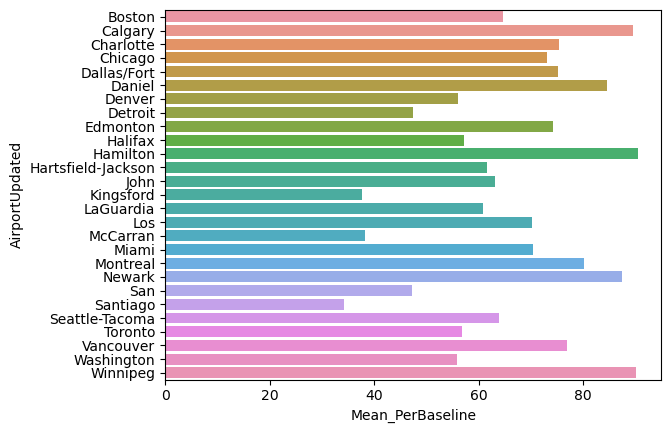

In [8]:
airportupdated = []

for i in df['AirportName']:
    airport2 = i.split()
    airportupdated.append(airport2[0])

data2 = {'AirportUpdated' : airportupdated, 'PercentOfBaseline' : df['PercentOfBaseline']}
df3 = pd.DataFrame(data2)

df3updated = df3.groupby('AirportUpdated', as_index = False).agg({'PercentOfBaseline' : 'mean'}).rename(columns = {'PercentOfBaseline' : 'Mean_PerBaseline'})

print(df3updated)

sns.barplot(y = 'AirportUpdated', x = 'Mean_PerBaseline', data = df3updated)

           Date  Mean_PerBaseline
0    2020-03-16         89.857143
1    2020-03-17         87.357143
2    2020-03-18         83.357143
3    2020-03-19         77.071429
4    2020-03-20         77.142857
..          ...               ...
257  2020-11-28         65.214286
258  2020-11-29         68.259259
259  2020-11-30         74.714286
260  2020-12-01         77.428571
261  2020-12-02         76.750000

[262 rows x 2 columns]


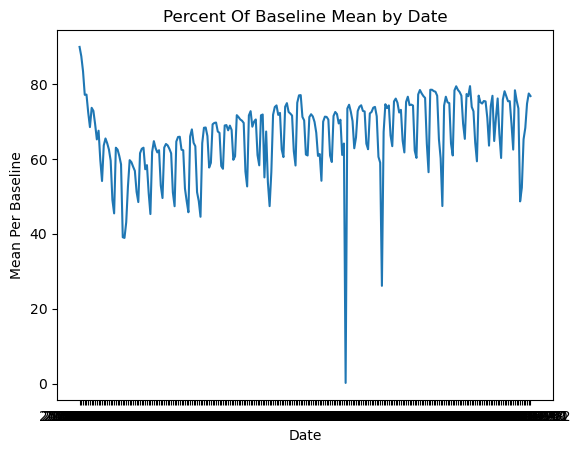

In [9]:
df4 = df.groupby('Date', as_index = False).agg({'PercentOfBaseline' : 'mean'}).rename(columns = {'PercentOfBaseline' : 'Mean_PerBaseline'})
print(df4)

plt.plot(df4['Date'], df4['Mean_PerBaseline'])

plt.xlabel('Date')
plt.ylabel('Mean Per Baseline')
plt.title('Percent Of Baseline Mean by Date')

plt.show()

                State  Mean_PerBaseline
0             Alberta         82.291751
1    British Columbia         76.885057
2          California         58.764818
3            Colorado         56.095785
4             Florida         70.482759
5             Georgia         61.706107
6              Hawaii         84.628352
7            Illinois         73.084291
8            Manitoba         90.157088
9       Massachusetts         64.704981
10           Michigan         47.432950
11             Nevada         38.218391
12         New Jersey         87.413793
13    New South Wales         37.750973
14           New York         61.975143
15     North Carolina         75.375479
16        Nova Scotia         57.154762
17            Ontario         73.595010
18             Quebec         80.250482
19  Santiago Province         34.273109
20              Texas         75.293893
21           Virginia         55.938697
22         Washington         63.980843


<Axes: xlabel='Mean_PerBaseline', ylabel='State'>

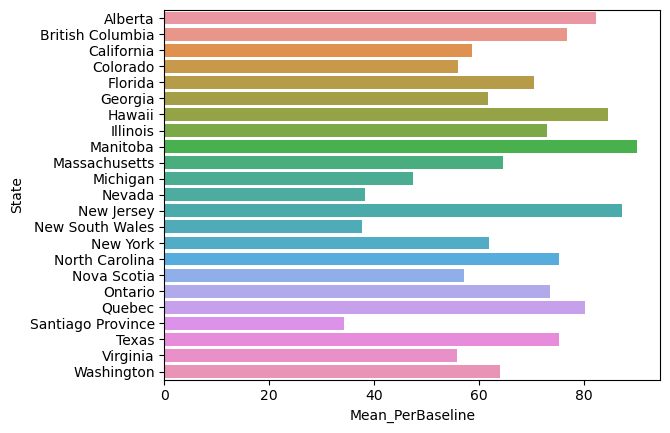

In [10]:
df5 = df.groupby('State', as_index = False).agg({'PercentOfBaseline' : 'mean'}).rename(columns = {'PercentOfBaseline' : 'Mean_PerBaseline'})
print(df5)

sns.barplot(y = 'State', x = 'Mean_PerBaseline', data = df5)

                   City  Mean_PerBaseline
0                Boston         64.704981
1               Calgary         89.513410
2             Charlotte         75.375479
3               Chicago         73.084291
4          College Park         61.706107
5                Denver         56.095785
6                Dorval         73.297710
7                Floris         55.938697
8             Grapevine         75.293893
9               Halifax         57.154762
10             Hamilton         90.426923
11         Leduc County         74.305085
12          Los Angeles         70.240458
13        Miami Springs         70.482759
14              Mirabel         87.338521
15          Mississauga         56.827586
16             New York         61.975143
17               Newark         87.413793
18             Paradise         38.218391
19             Richmond         76.885057
20              Romulus         47.432950
21             Santiago         34.273109
22               SeaTac         63

<Axes: xlabel='Mean_PerBaseline', ylabel='City'>

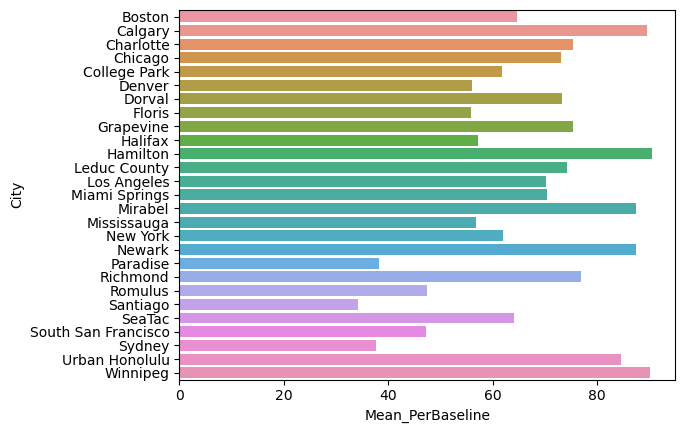

In [11]:
df6 = df.groupby('City', as_index = False).agg({'PercentOfBaseline' : 'mean'}).rename(columns = {'PercentOfBaseline' : 'Mean_PerBaseline'})
print(df6)

sns.barplot(y = 'City', x = 'Mean_PerBaseline', data = df6)